<a href="https://colab.research.google.com/github/Pankaj122002/Python/blob/Machine-Learning/Diabetes_based_on_health_condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#Importing dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# Loading Dataset

In [66]:
data = pd.read_csv('/content/Diabetes Based on Health Condition.csv')
print("Successfully Imported Data!")
data.head()

Successfully Imported Data!


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [67]:
print(data.shape)

(768, 9)


# Description

In [68]:
data.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Finding Null Values

In [69]:
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [70]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [71]:
data.groupby('Age').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Age                                                                      
21      1.079365  108.317460      65.936508      19.349206   73.634921   
22      1.555556  108.208333      63.722222      20.486111   74.486111   
23      1.578947  111.578947      64.315789      22.368421  118.026316   
24      1.891304  117.891304      64.956522      25.934783   88.021739   
25      1.770833  110.083333      59.666667      23.958333   82.895833   
26      1.969697  118.212121      64.181818      23.666667   90.878788   
27      2.562500  115.281250      73.500000      18.375000   63.125000   
28      3.028571  119.914286      68.314286      23.628571   94.600000   
29      3.310345  127.379310      68.241379      21.000000   88.793103   
30      3.619048  122.285714      64.857143      18.904762   82.666667   
31      3.875000  126.958333      64.375000      20.000000  111.166667   
32      4.437500  116.312500      70.062500      18.187500   35.812500   
33      4.058824  122.882353      65.647059      21.705882   85.588235   
34      5.857143  131.857143      74.000000      18.714286  148.071429   
35      5.000000  121.400000      75.600000      22.600000   75.000000   
36      5.187500  132.437500      69.125000      19.187500   65.812500   
37      5.263158  130.157895      75.947368      18.315789   59.263158   
38      6.875000  121.125000      71.125000      19.625000   33.500000   
39      7.416667  126.750000      72.666667      26.083333   72.416667   
40      6.230769  130.923077      69.230769      24.230769   72.307692   
41      6.500000  129.090909      67.590909      17.409091   38.818182   
42      6.888889  109.555556      73.388889      19.222222   61.277778   
43      7.769231  133.000000      78.461538      27.846154  125.153846   
44      7.250000  124.375000      61.750000       4.625000   32.250000   
45      7.333333  131.200000      83.066667      20.600000   31.133333   
46      6.384615  105.923077      76.000000      24.153846  112.307692   
47      8.333333  137.000000      78.333333      14.500000   49.166667   
48      8.800000  107.600000      78.400000      23.400000   52.000000   
49      7.600000  153.000000      81.400000      21.600000   55.200000   
50      6.750000  138.250000      78.250000      16.000000   26.375000   
51      8.625000  147.625000      84.500000      21.875000  129.375000   
52      4.625000  133.000000      81.500000      13.375000   94.500000   
53      5.400000  158.000000      79.000000      21.200000  183.000000   
54      7.000000  140.333333      89.333333       8.833333   61.000000   
55      5.500000  140.750000      70.250000      16.250000   83.750000   
56      8.000000   98.333333      76.333333      32.333333   69.000000   
57      8.800000  137.800000      76.800000       9.600000   78.000000   
58      7.142857  135.142857      78.285714      19.285714  167.857143   
59      2.333333  173.333333      74.000000      16.666667  282.000000   
60      6.000000  146.400000      80.000000      20.000000  164.200000   
61      5.500000  144.000000      76.000000      16.500000   95.000000   
62      3.750000  139.500000      71.500000      29.000000    0.000000   
63      5.500000  133.250000      78.000000      23.500000   45.000000   
64      8.000000  120.000000      78.000000       0.000000    0.000000   
65      3.333333  137.000000      78.666667      12.333333    0.000000   
66      5.000000  157.000000      86.000000       0.000000    0.000000   
67      4.000000  132.333333      72.666667       0.000000    0.000000   
68      8.000000   91.000000      82.000000       0.000000    0.000000   
69      5.000000  134.000000      81.000000       0.000000    0.000000   
70      4.000000  145.000000      82.000000      18.000000    0.000000   
72      2.000000  119.000000       0.000000       0.000000    0.000000   
81      9.000000  134.000000      74.000000      33.000000   60.000000   

        

In [72]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [73]:
data['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [74]:
#0 means no diabeted
#1 means patient with diabtes

# Data Analysis:

## Countplot:

<Axes: xlabel='Age', ylabel='count'>

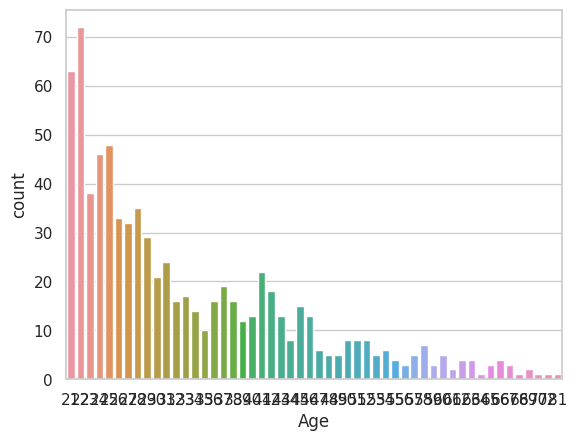

In [75]:
sns.countplot(x = 'Age' , data = data)


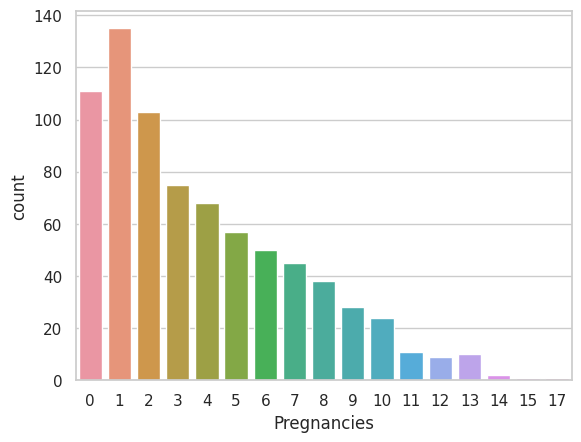

In [76]:
sns.countplot(x = 'Pregnancies' , data = data)
plt.show()

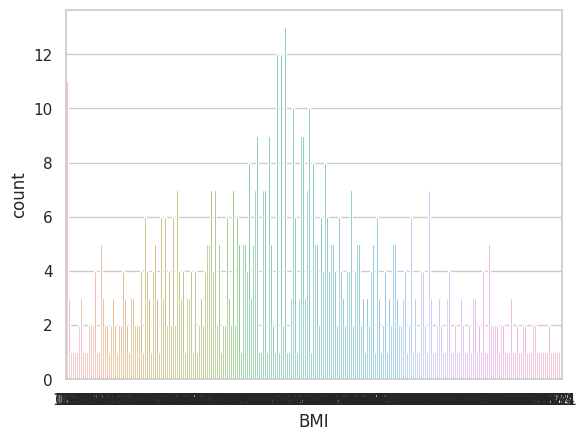

In [77]:
sns.countplot(x = 'BMI' , data = data)
plt.show()

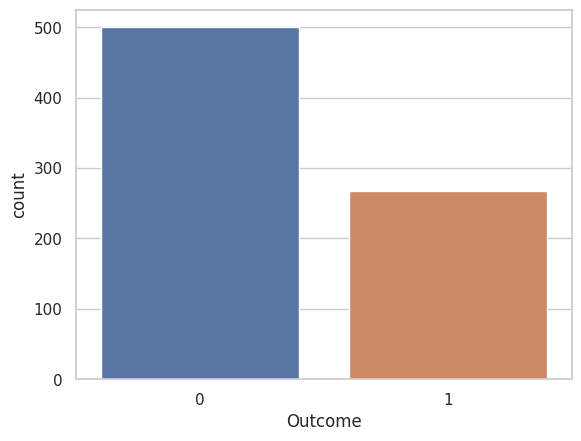

In [78]:
sns.countplot(x = 'Outcome' , data = data)
plt.show()

# Distplot:

<ipython-input-79-48480074d0f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Outcome'])


<Axes: xlabel='Outcome', ylabel='Density'>

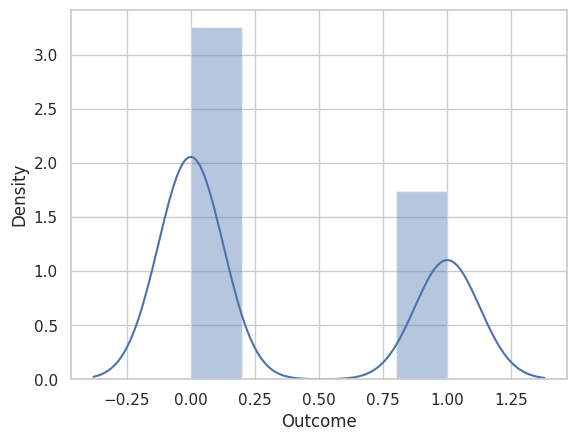

In [79]:
sns.distplot(data['Outcome'])

<ipython-input-80-0d007cee2f85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

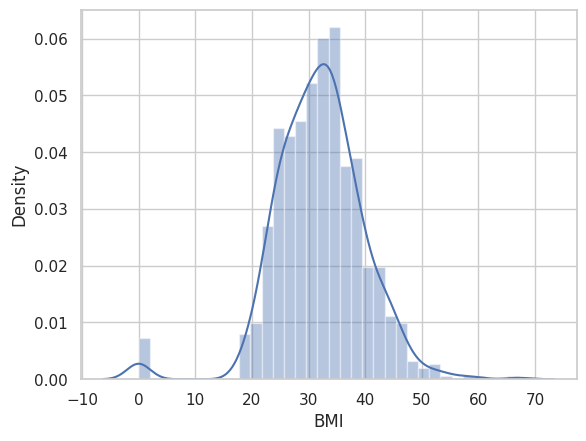

In [80]:
sns.distplot(data['BMI'])

<ipython-input-81-9cc6d61b8ae2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

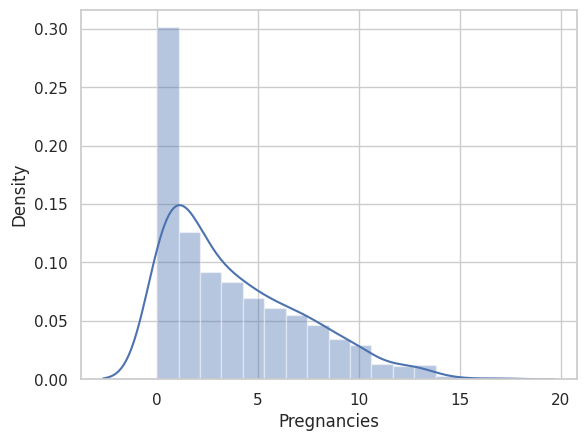

In [81]:
sns.distplot(data['Pregnancies'])

<ipython-input-82-ec135ce2bd5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

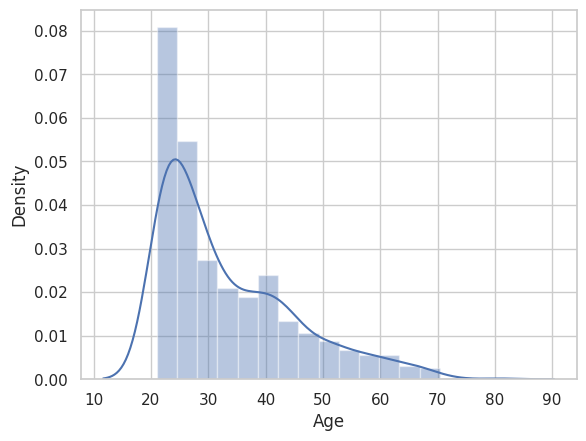

In [82]:
sns.distplot(data['Age'])

<ipython-input-83-1a7935518a7f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

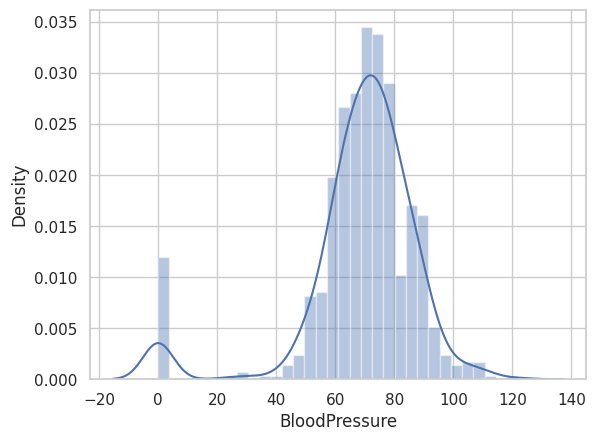

In [83]:
sns.distplot(data['BloodPressure'])

<ipython-input-84-ba3e8336047c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

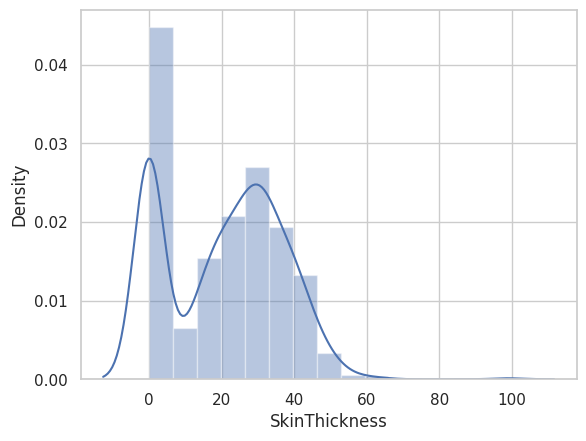

In [84]:
sns.distplot(data['SkinThickness'])

Pregnancies                    Axes(0.125,0.712609;0.168478x0.167391)
Glucose                     Axes(0.327174,0.712609;0.168478x0.167391)
BloodPressure               Axes(0.529348,0.712609;0.168478x0.167391)
SkinThickness               Axes(0.731522,0.712609;0.168478x0.167391)
Insulin                        Axes(0.125,0.511739;0.168478x0.167391)
BMI                         Axes(0.327174,0.511739;0.168478x0.167391)
DiabetesPedigreeFunction    Axes(0.529348,0.511739;0.168478x0.167391)
Age                         Axes(0.731522,0.511739;0.168478x0.167391)
Outcome                         Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

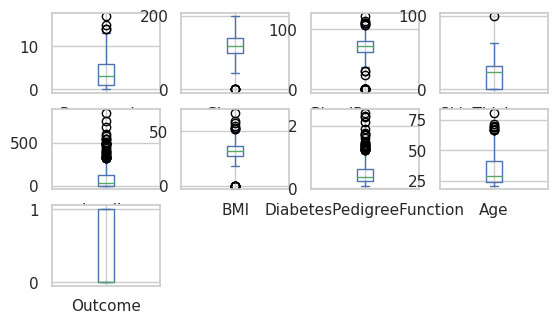

In [85]:
data.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

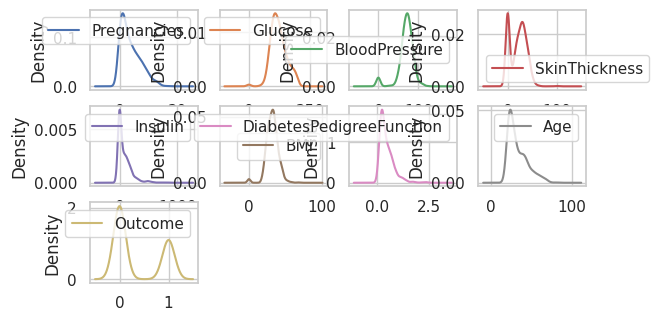

In [86]:
data.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

# Histogram

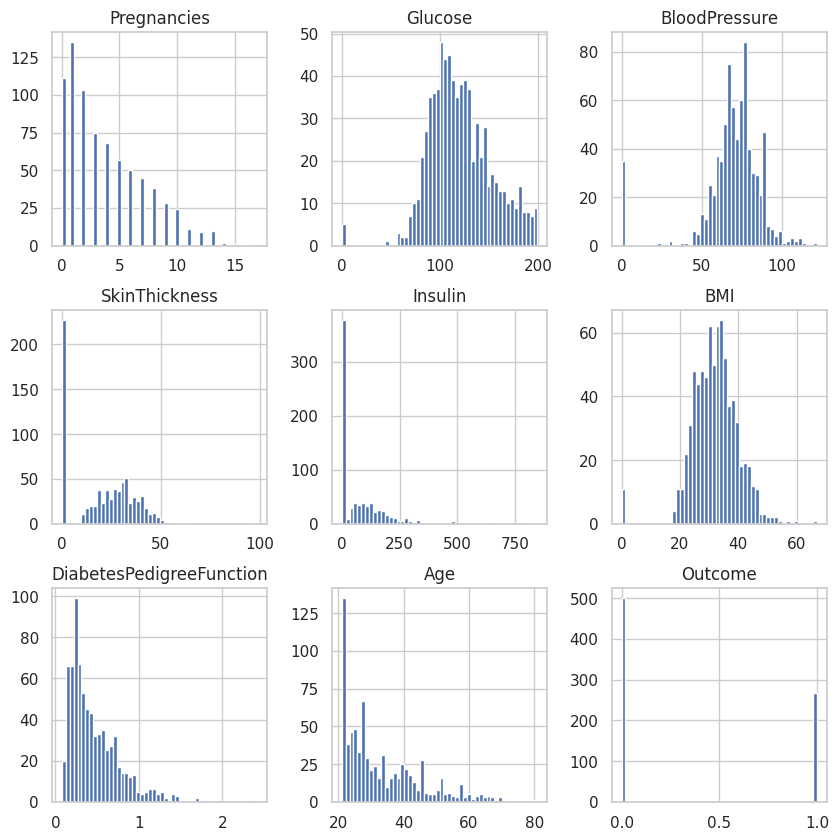

In [87]:
data.hist(figsize=(10,10),bins=50)
plt.show()

# Heatmap for expressing correlation

<Axes: >

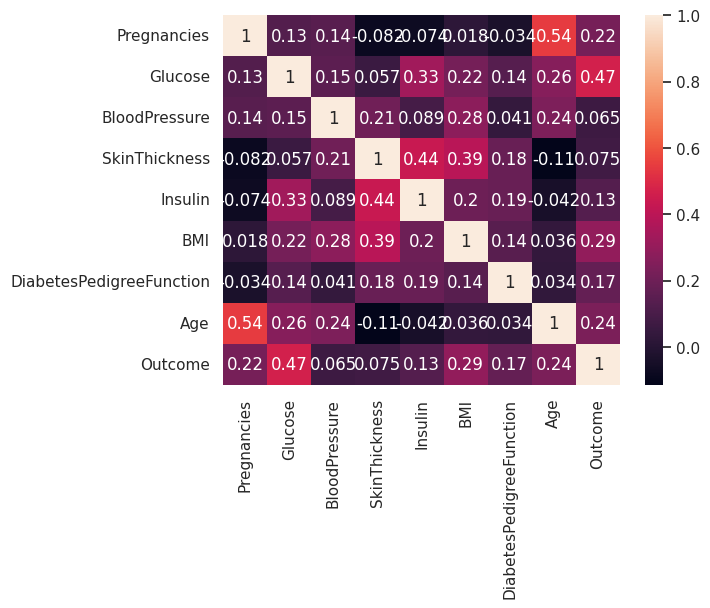

In [88]:
corr = data.corr()
sns.heatmap(corr,annot=True)

# Box plot for outlier visualization

<Axes: >

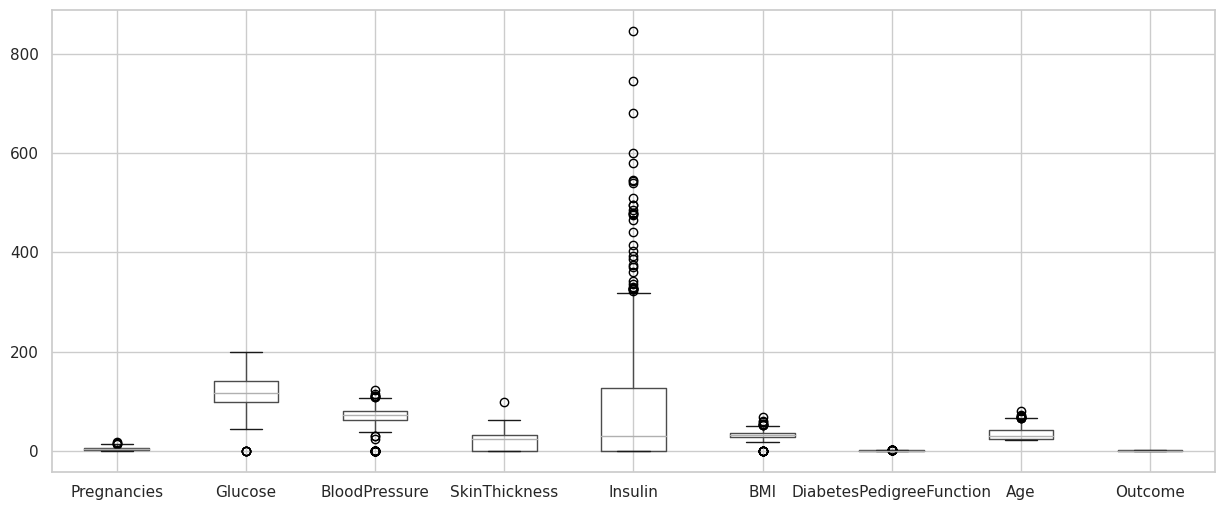

In [89]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

# Pairplot:

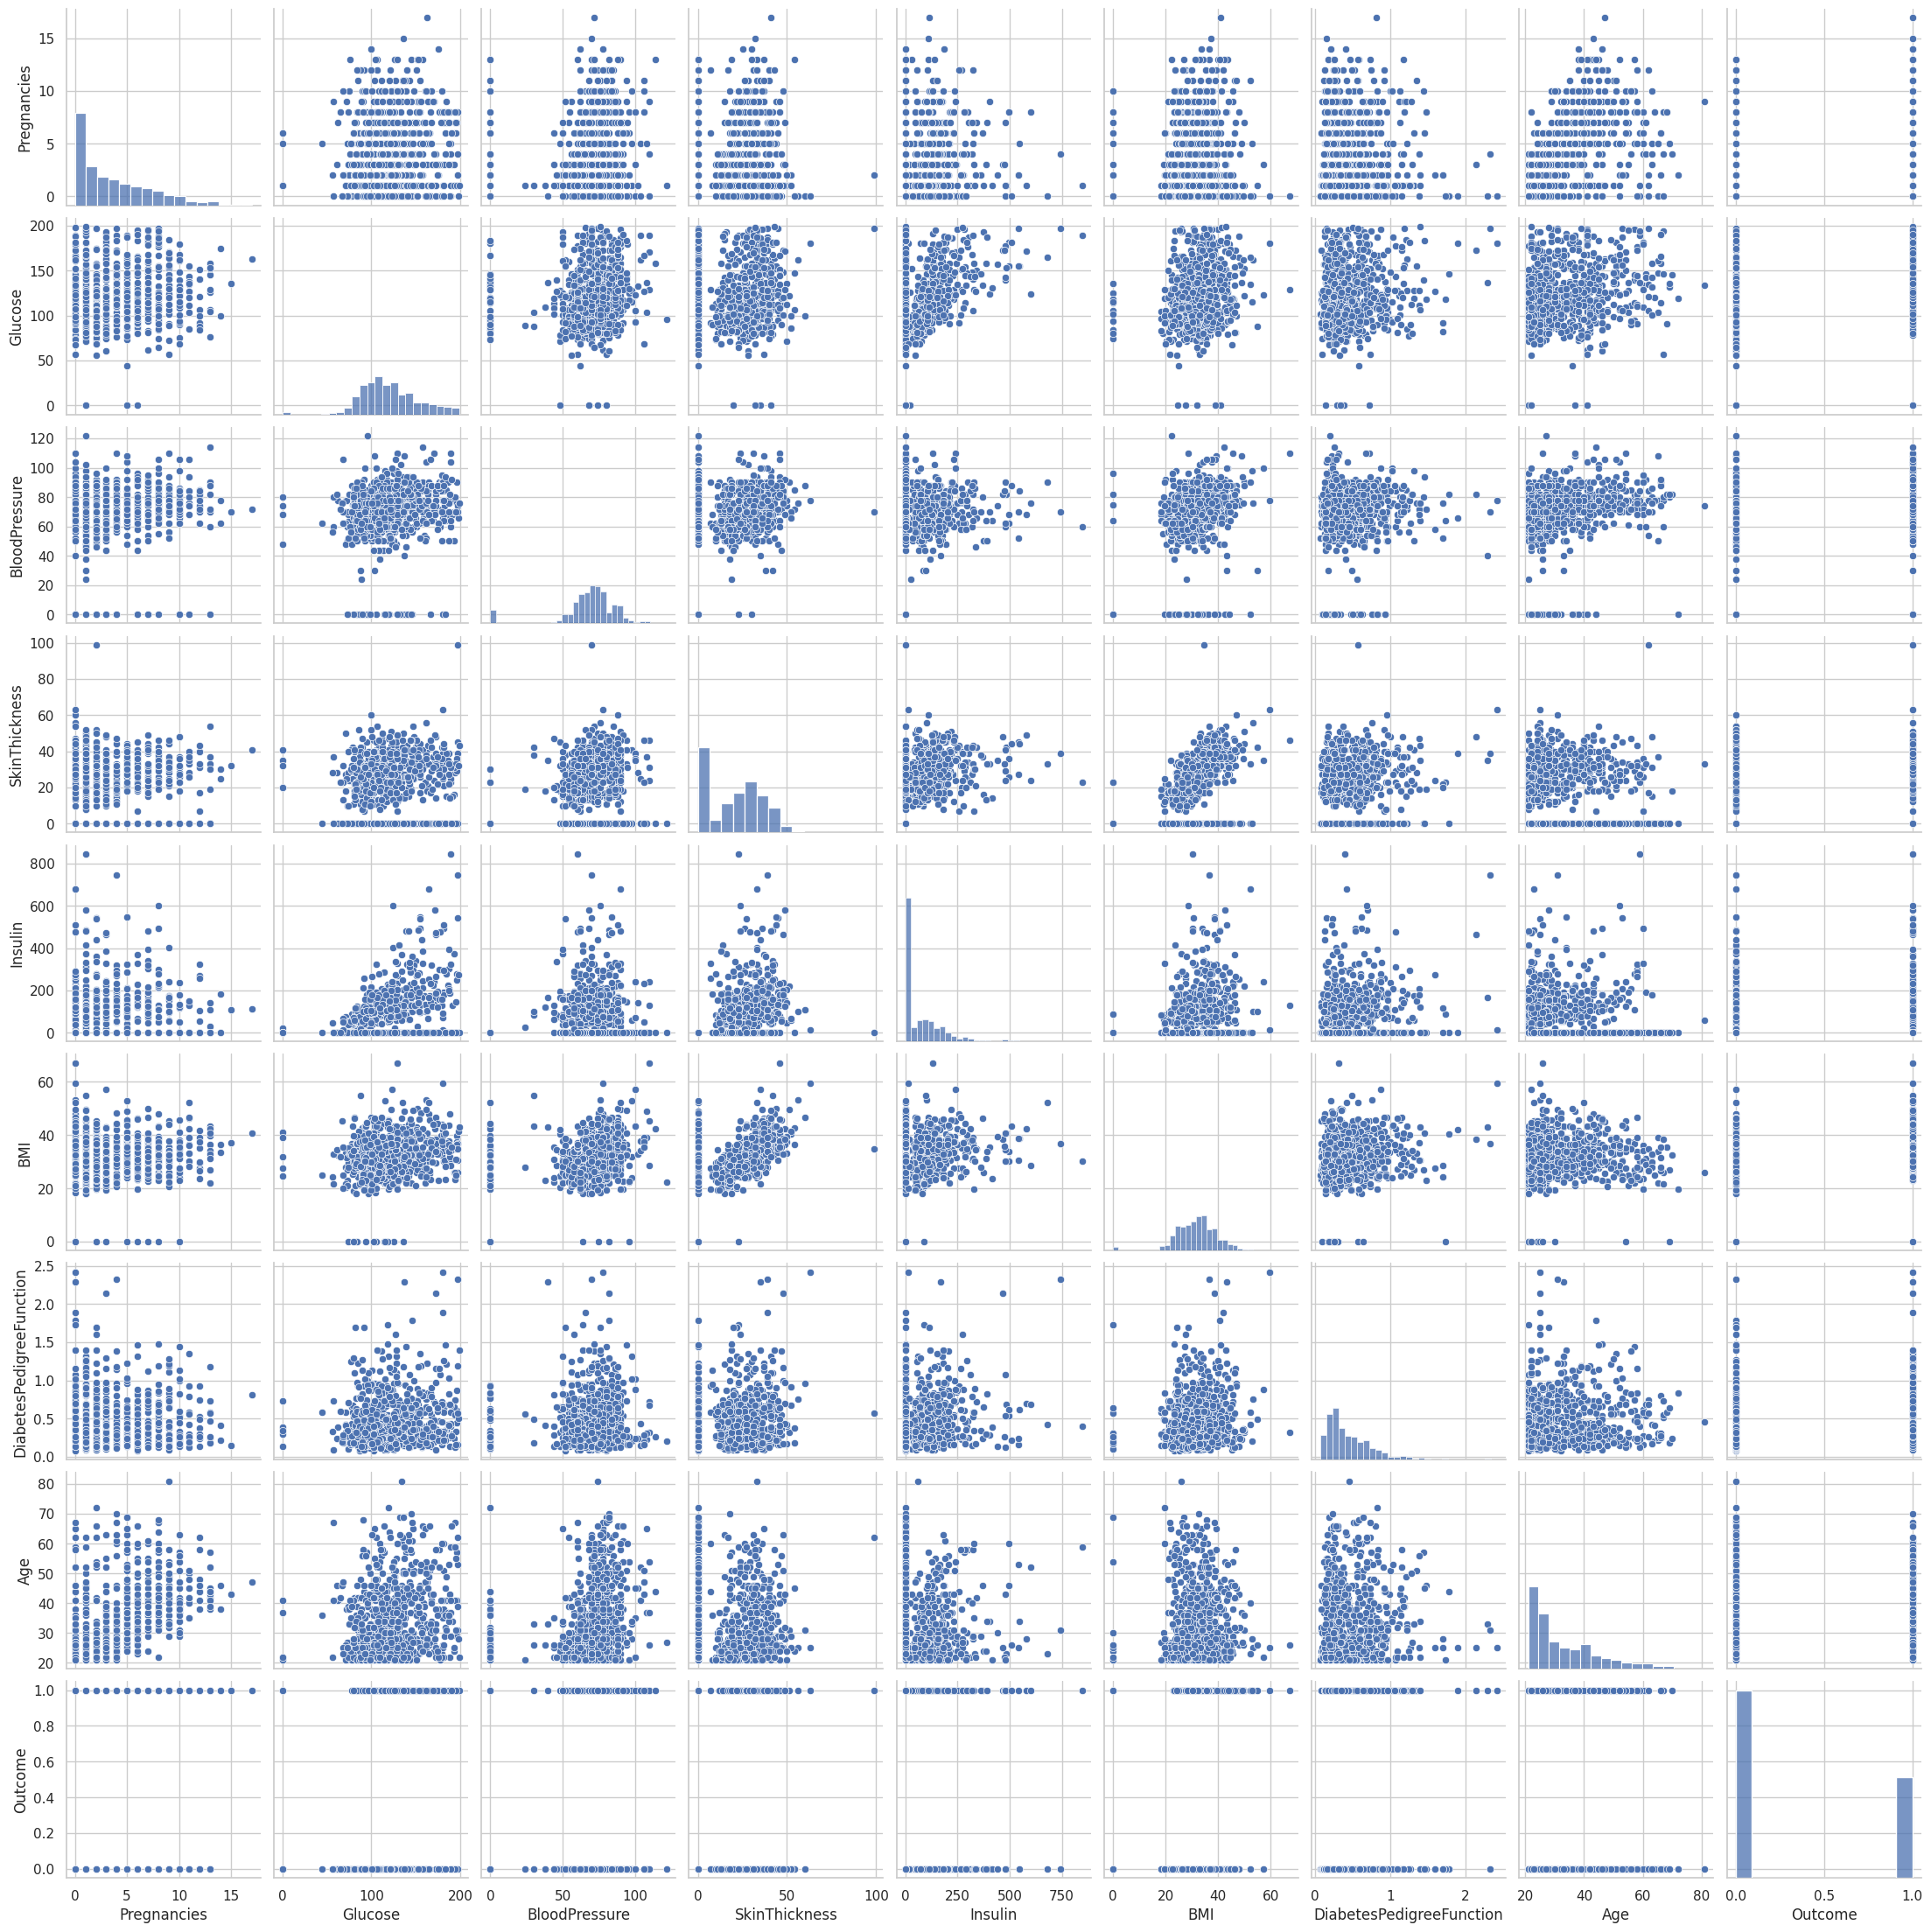

In [90]:
sns.pairplot(data)


# Violinplot:

<Axes: xlabel='Outcome', ylabel='Age'>

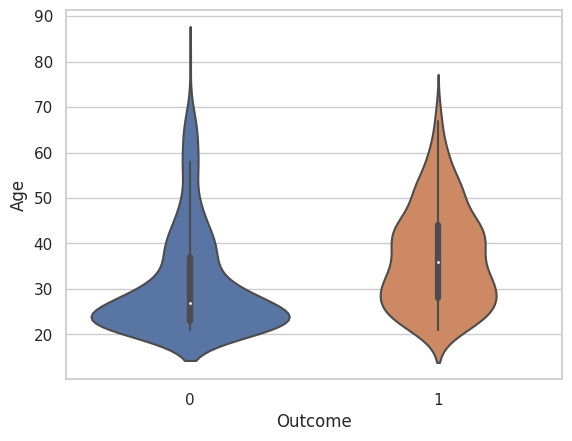

In [91]:
sns.violinplot(x='Outcome', y='Age', data=data)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

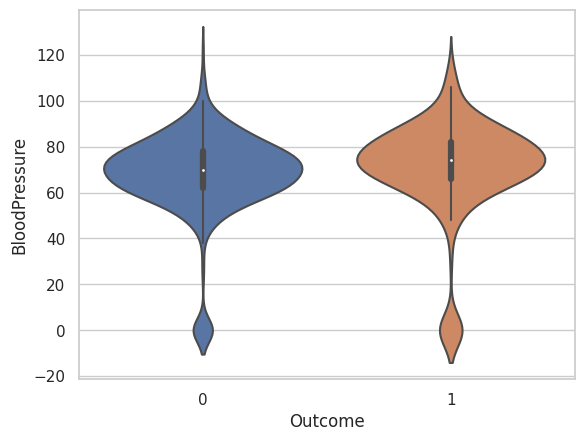

In [92]:
sns.violinplot(x='Outcome', y='BloodPressure', data=data)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

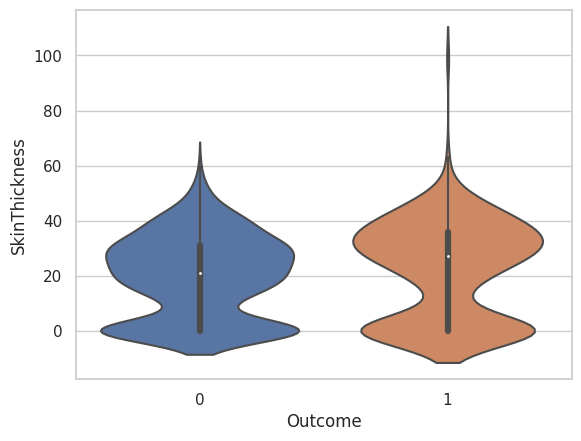

In [93]:
sns.violinplot(x='Outcome', y='SkinThickness', data=data)

# Pairplot:

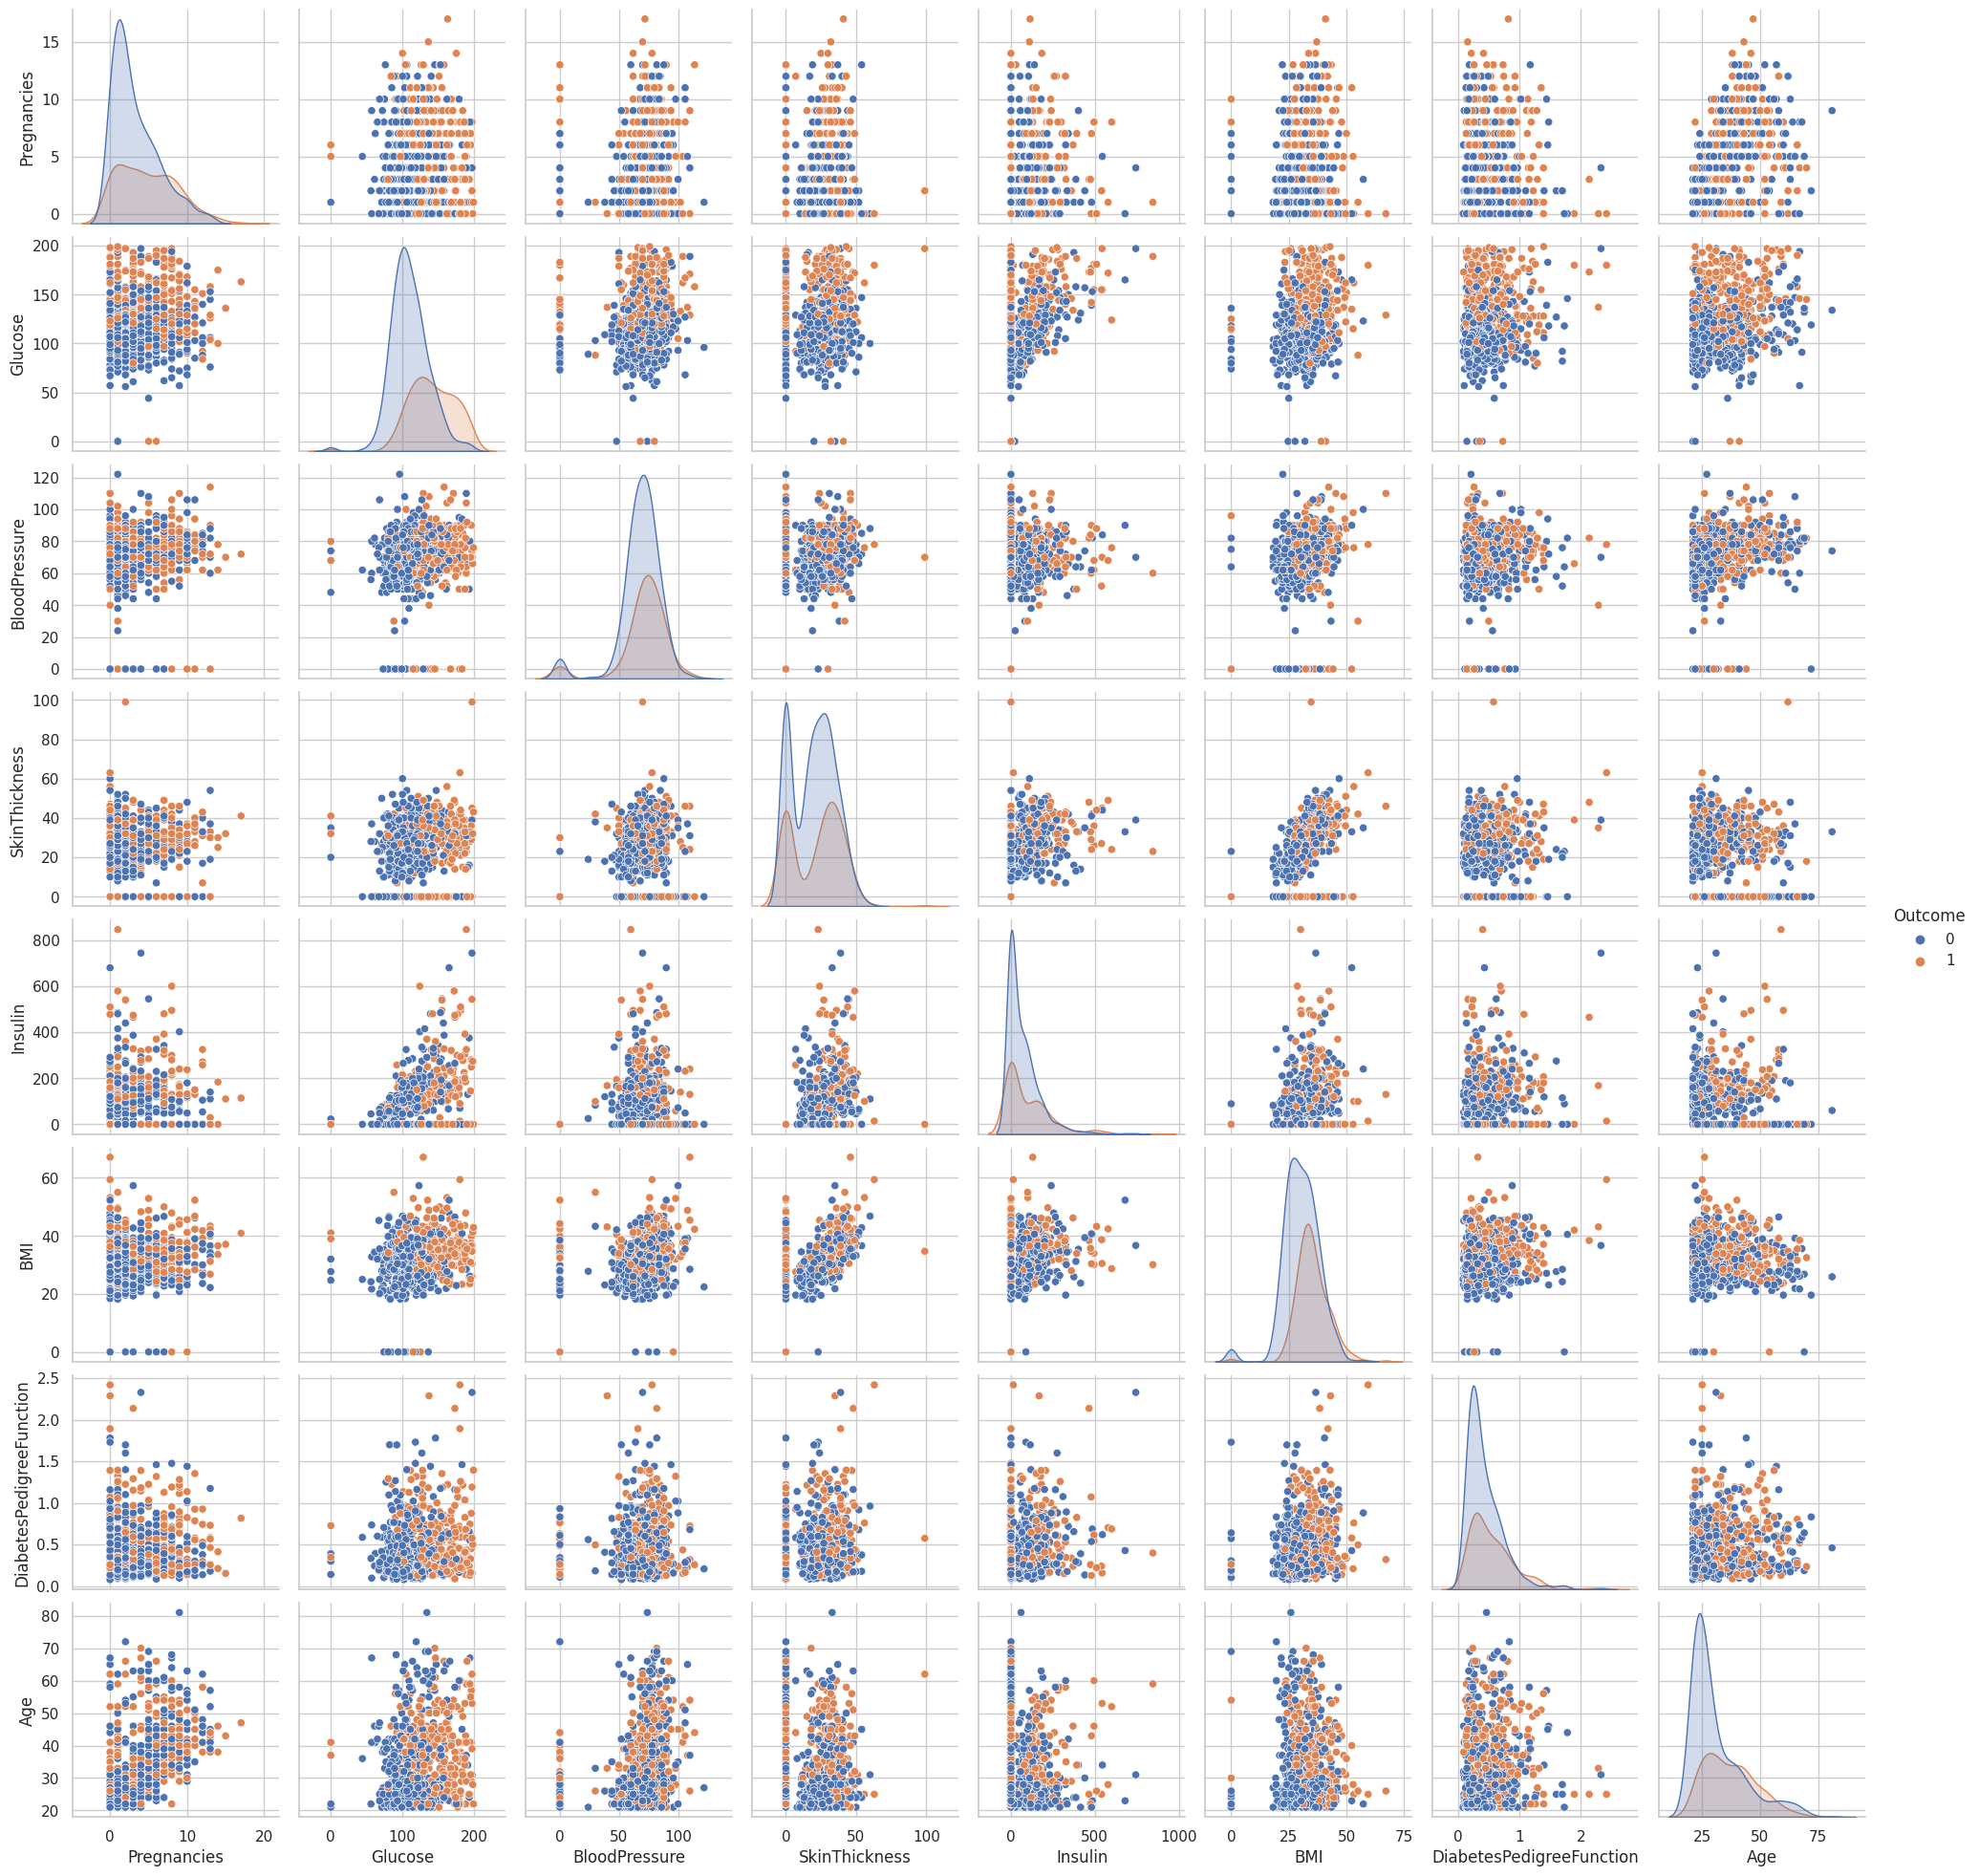

In [94]:
sns.pairplot(data,hue='Outcome');

# Feature Selection

In [95]:
#lets extract features and targets
X = data.drop(columns=['Outcome'])
Y = data['Outcome']
print("Features Extraction Sucessfull")

Features Extraction Sucessfull


# Feature Importance

In [96]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.10838157 0.23334988 0.09884083 0.07762423 0.07634914 0.14759746
 0.11782704 0.14002985]


# Splitting Dataset

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Using Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7922077922077922


In [127]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[89 16]
 [16 33]]


# Using KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,Y_train)
y_pred = kn.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.7467532467532467


# Using SVC

In [129]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
pred_y = svc.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.7857142857142857


# Using Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=7)
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.6883116883116883


# Using GaussianNB

In [136]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,Y_train)
y_pred3 = gb.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7792207792207793


# Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, Y_train)
y_pred2 = rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.7792207792207793


# Using Xgboost

In [133]:
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=1)
xg.fit(X_train, Y_train)
y_pred5 = xg.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.7662337662337663


# Results

In [138]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.792,0.746,0.785,0.688,0.779,0.779,0.766]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                     Model
Score                     
0.792  Logistic Regression
0.785                  SVC
0.779           GaussianNB
0.779        Random Forest
0.766              Xgboost
0.746                  KNN
0.688        Decision Tree


In [107]:
#Hence I will use Logistic Regression algorithm for training my model.